In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    if files[i].endswith('.csv'):
        shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    if files[i].endswith('.csv'):
        shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')
#Import demographics on control group 
control_info = pd.read_csv('scores.csv')

In [3]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)

In [4]:
#get daily data for control group
control_daily = list()
for i in range(0,len(shizophrenia_c)):
    control_daily.append(get_intervals(shizophrenia_c[i],intervals = 0))

# get day and night data for patients 
control_day = list()
for i in range(0,len(shizophrenia_c)):
    control_day.append(get_intervals(shizophrenia_c[i],intervals = 1))

control_night = list()
for i in range(0,len(shizophrenia_c)):
    control_night.append(get_intervals(shizophrenia_c[i],intervals = 2))

In [5]:
#get daily data for patients
patients_daily = list()
for i in range(0,len(shizophrenia_p)):
    patients_daily.append(get_intervals(shizophrenia_p[i],intervals = 0))

# get day and night data for patients 
patients_day = list()
for i in range(0,len(shizophrenia_p)):
    patients_day.append(get_intervals(shizophrenia_p[i],intervals = 1))

patients_night = list()
for i in range(0,len(shizophrenia_p)):
    patients_night.append(get_intervals(shizophrenia_p[i],intervals = 2))

# Explorative TS analysis 

## 1. Visual Analysis

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Patient')

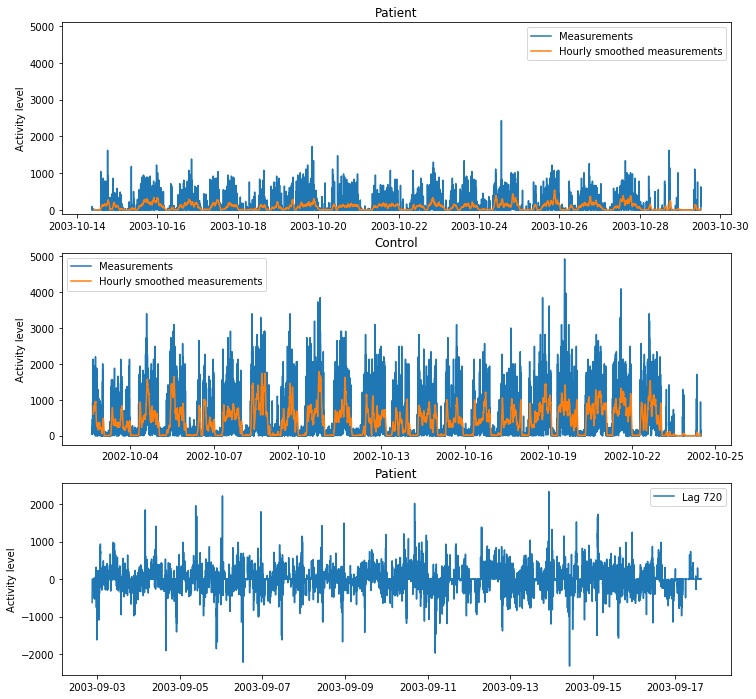

In [6]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'])
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'].rolling(60).mean())
ax1.set_ylabel('Activity level')
ax1.legend(['Measurements','Hourly smoothed measurements'])
ax1.set_title('Patient')
ax1.set_ylim(top=5100)

ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'])
ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'].rolling(60).mean())
#ax2.xticks(rotation=45)
ax2.set_ylabel('Activity level')
ax2.legend(['Measurements','Hourly smoothed measurements'])
ax2.set_title('Control')
ax2.set_ylim(top=5100)

ax3.plot(shizophrenia_p[1]['timestamp'],shizophrenia_p[1]['activity'].diff(720))
#ax2.xticks(rotation=45)
ax3.set_ylabel('Activity level')
ax3.legend(['Lag 720'])
ax3.set_title('Patient')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


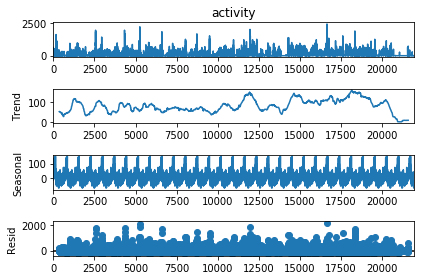

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(shizophrenia_p[1]['activity'], model='additive', freq=720)
result.plot()
plt.show()

Text(0.5,1,'Differencing time series daily shift')

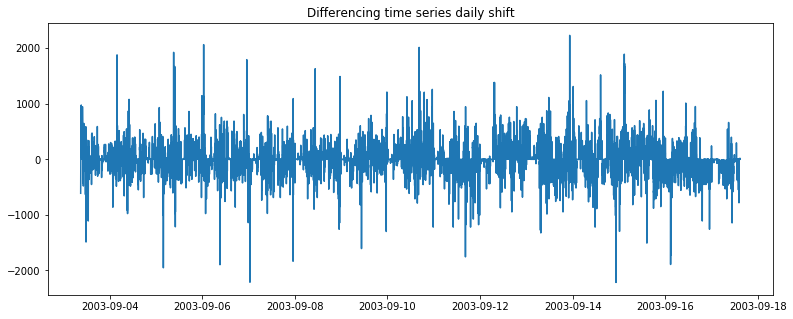

In [8]:
## Differencing time series 
fig = plt.figure(figsize=(13,5))
plt.plot(shizophrenia_p[1]['timestamp'],shizophrenia_p[1]['activity'].diff(1440))
plt.title('Differencing time series daily shift')

Text(0.5,1,'Differencing time series minute shift')

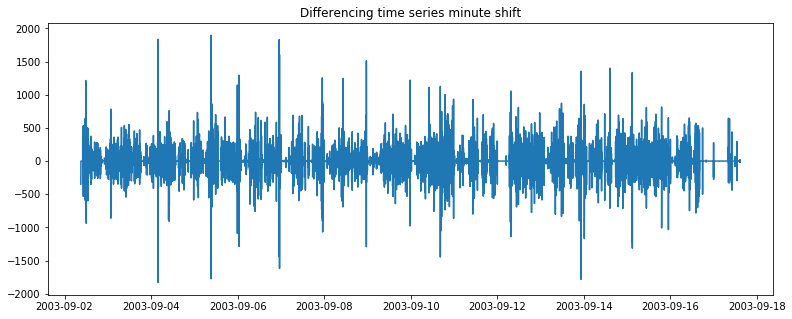

In [9]:
fig = plt.figure(figsize=(13,5))
plt.plot(shizophrenia_p[1]['timestamp'],shizophrenia_p[1]['activity'].diff())
plt.title('Differencing time series minute shift')

## 2. Test for Stationarity 

In [10]:
## Test for Stationarity in lagged time series
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller, kpss
adfull_p = []
kpss_p = []
adfull_c = []
kpss_c = []
i = 0
j = 0
for i in range(0,len(shizophrenia_p)):
               adfull_p.append(adfuller(shizophrenia_p[i]['activity'].diff()[1:], regression='c', autolag='AIC')[1])
               kpss_p.append(kpss(shizophrenia_p[i]['activity'].diff()[1:], regression='c', lags='auto')[1])
for j in range(0,len(shizophrenia_c)):
               adfull_c.append(adfuller(shizophrenia_c[j]['activity'].diff()[1:], regression='c', autolag='AIC')[1])
               kpss_c.append(kpss(shizophrenia_c[j]['activity'].diff()[1:], regression='c', lags='auto')[1])
               


KeyboardInterrupt: 

In [ ]:
'AdFuller Patients', 'Kpss Patients','AdFuller Control', 'Kpss Control'
frame = { 'AdFuller Patients': pd.Series(adfull_p), 'Kpss Patients': pd.Series(kpss_p) ,'AdFuller Control': pd.Series(adfull_c), 'Kpss Control': pd.Series(kpss_c)}
pValueTable = pd.DataFrame(frame)
print('Stationary time series for Patients and Controls')

## 3. Anaylsis of Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
## Analysis of autocorrelation patients
plot_acf(shizophrenia_p[1]['activity'].diff()[1:], fft= True)
plt.show()
plot_pacf(shizophrenia_p[1]['activity'].diff()[1:])
plt.show()
print('MA1 or MA2 process')

In [ ]:
## Analysis of autocorrelation patients
plot_acf(pd.Series(list(trans)).diff()[1:], fft= True)
plt.show()
plot_pacf(pd.Series(list(trans)).diff()[1:])
plt.show()
print('MA1 or MA2 process')

## 4a. ARIMA Model Fit 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_list = list()
i=0
for i in range(0, len(shizophrenia_p)):
    model = SARIMAX(shizophrenia_p[i]['activity'], order=(0,1,2))
    model_list.append(model.fit())


## Check on Resiudals and GARCH model 

In [ ]:
pd.Series(a.resid).plot()

In [ ]:
plot_acf(a.resid, fft= True)
plt.show()
plot_pacf(a.resid)
plt.show()

In [ ]:
import pyflux as pf
resids = pd.Series(a.resid)
mod = pf.GARCH(resids.values,p=1,q=1)
x = mod.fit(figsize=(20,10))

In [ ]:
x.summary()
mod.plot_fit()

## 5. Parameters extraction for Patients

In [ ]:
rv_maL1 = np.zeros(len(model_list))
rv_maL2 = np.zeros(len(model_list))
rv_sig = np.zeros(len(model_list))
for l in range(0,len(model_list)):
    rv_maL1[l] = model_list[l].params['ma.L1'] 
    rv_maL2[l] = model_list[l].params['ma.L2'] 
    rv_sig[l] = model_list[l].params['sigma2'] 

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(5,10))
ax1.hist(x=rv_maL1, bins=7, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
ax2.hist(x=rv_maL2, bins=7, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
ax3.hist(x=rv_sig, bins=7, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

## 6. Bootstrapping of parameter values

In [ ]:
from sklearn.utils import resample
boot_maL1 = resample(rv_maL1, replace=True, n_samples=100, random_state=120)
boot_maL2 = resample(rv_maL2, replace=True, n_samples=100, random_state=120)
boot_sig = resample(rv_maL1, replace=True, n_samples=100, random_state=120)

norm_maL1 = np.random.normal(np.mean(boot_maL1), np.std(boot_maL1), 1000)
norm_maL2 = np.random.normal(np.mean(boot_maL2), np.std(boot_maL2), 1000)
norm_sigm = np.random.normal(np.mean(boot_sig), np.std(boot_sig), 1000)
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax1.hist(x=norm_maL1, bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
ax1.set_title('Moving Average L1')
ax2.hist(x=norm_maL2, bins=100, color='green',
                            alpha=0.7, rwidth=0.85)
ax2.set_title('Moving Average L2')
ax3.hist(x=norm_sigm, bins=100, color='orange',
                            alpha=0.7, rwidth=0.85)
ax3.set_title('Sigma')

## 7. Draw randomly from parameter vectors & build new model 

In [ ]:
L1 = np.random.choice(norm_maL1)
L2 = np.random.choice(norm_maL2)
sign = np.random.choice(norm_sigm)

from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(12345)

maparams = np.array([L1, L2])

ma = np.r_[1, maparams] # add zero-lag
arma_process = ArmaProcess(ar=None, ma = ma, nobs= 1000)
test = arma_process.generate_sample(nsample=500, scale=sign, distrvs=garch([163.4027], [0.7274], [0.4945], n_out=500) )

In [ ]:
fig = plt.figure(figsize=(13,5))
plt.plot(test)
fig = plt.figure(figsize=(13,5))
plt.plot(shizophrenia_p[1]['activity'][900:1500].diff())
fig = plt.figure(figsize=(13,5))
plt.plot(shizophrenia_p[1]['activity'][900:1500])


## Fast Fourier Transformation

In [73]:
from scipy.fftpack import fft, fftfreq, ifft
k = 19
trans_fft = fft(shizophrenia_p[k]['activity'])
trans_psd = np.abs(trans_fft) ** 2
#Since the original sampling frequency is 32 Hz according to paper
fftfreq = fftfreq(len(trans_psd), 1. / 32)
l = fftfreq > 0

Text(0,0.5,'PSD (dB)')

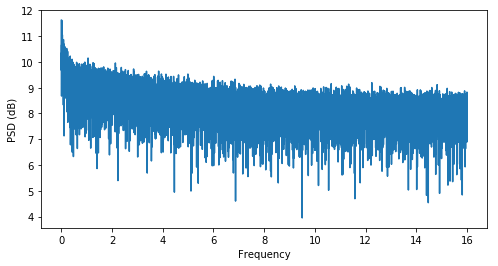

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[l], np.log10(trans_psd[l]))
ax.set_xlabel('Frequency')
#ax.set_xlim(0,0.5)
ax.set_ylabel('PSD (dB)')

In [75]:
max_peak = fftfreq[pd.Series(trans_psd)[1:].idxmax()]
print('max Peak:', max_peak)

max Peak: 0.022022602144306


In [76]:
trans_fft_bis = trans_fft.copy()
trans_fft_bis1 = trans_fft.copy()
trans_fft_bis[np.abs(fftfreq) > 0.5] = 0
#Delete Frequencies over the max peak to decrease the noise!
trans_fft_bis1[np.abs(fftfreq) > max_peak] = 0

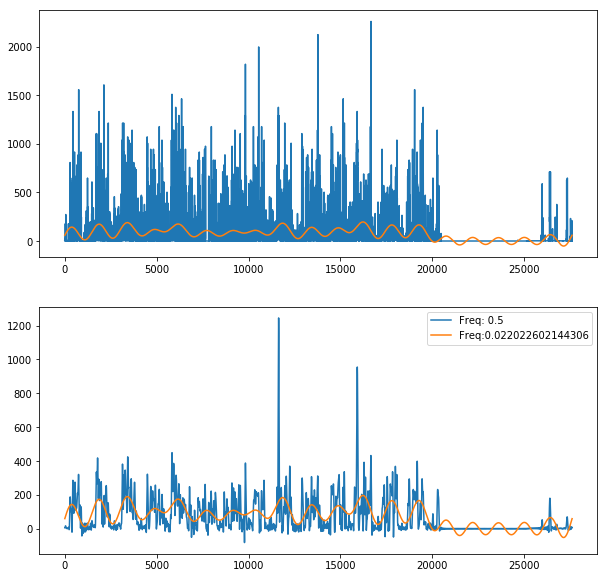

In [77]:
trans = np.real(ifft(trans_fft_bis))
trans1 = np.real(ifft(trans_fft_bis1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(shizophrenia_p[k]['activity'].index, shizophrenia_p[k]['activity'])
ax1.set_label('Original TS')
ax1.plot(shizophrenia_p[k]['activity'].index, trans1)
ax2.plot(shizophrenia_p[k]['activity'].index, trans)
ax2.plot(shizophrenia_p[k]['activity'].index, trans1)
ax2.set_label('Fourier transformed TS')
ax2.legend(['Freq: 0.5','Freq:'+str(max_peak)])

## ARIMA(0,1,2) on freq 0.5 transformed ts

In [ ]:
model = SARIMAX(trans, order=(0,1,2))
a = model.fit()
a.summary()

In [ ]:
a.plot_diagnostics()
plt.show()